In [1]:
import pandas as pd

#Reading the dataset
data = pd.read_csv('personality_dataset.csv')

#Dataset preview
data.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,3.0,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [2]:
#Renaming features for readability
data.rename(columns={'Time_spent_Alone':'Isolation(0-11)hrs/day','Going_outside':'Roaming_out(0-7)',
                     'Drained_after_socializing':'Social_fatigue','Social_event_attendance':
                     'Social_event_attendance(0-10)','Friends_circle_size':'Close_Friends(0-15)',
                     'Post_frequency':'Post_freq(0-10)'},inplace=True)
data.head(5)

,Isolation(0-11)hrs/day,Stage_fear,Social_event_attendance(0-10),Roaming_out(0-7),Social_fatigue,Close_Friends(0-15),Post_freq(0-10),Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
data.shape

(2900, 8)

In [4]:
#Checking for null values
nulls = data.isnull().sum()
nulls

Isolation(0-11)hrs/day           0
Stage_fear                       0
Social_event_attendance(0-10)    0
Roaming_out(0-7)                 0
Social_fatigue                   0
Close_Friends(0-15)              0
Post_freq(0-10)                  0
Personality                      0
dtype: int64

In [5]:
#As other features have no numerical values, they're ignored for description
data[['Isolation(0-11)hrs/day','Roaming_out(0-7)'
    ,'Social_event_attendance(0-10)','Close_Friends(0-15)',
    'Post_freq(0-10)']].describe()


,Isolation(0-11)hrs/day,Roaming_out(0-7),Social_event_attendance(0-10),Close_Friends(0-15),Post_freq(0-10)
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.000000,3.963354,6.268863,3.564727
std,3.441180,2.221597,2.872608,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000
50%,4.000000,3.000000,3.963354,5.000000,3.000000
75%,7.000000,5.000000,6.000000,10.000000,6.000000
max,11.000000,7.000000,10.000000,15.000000,10.000000


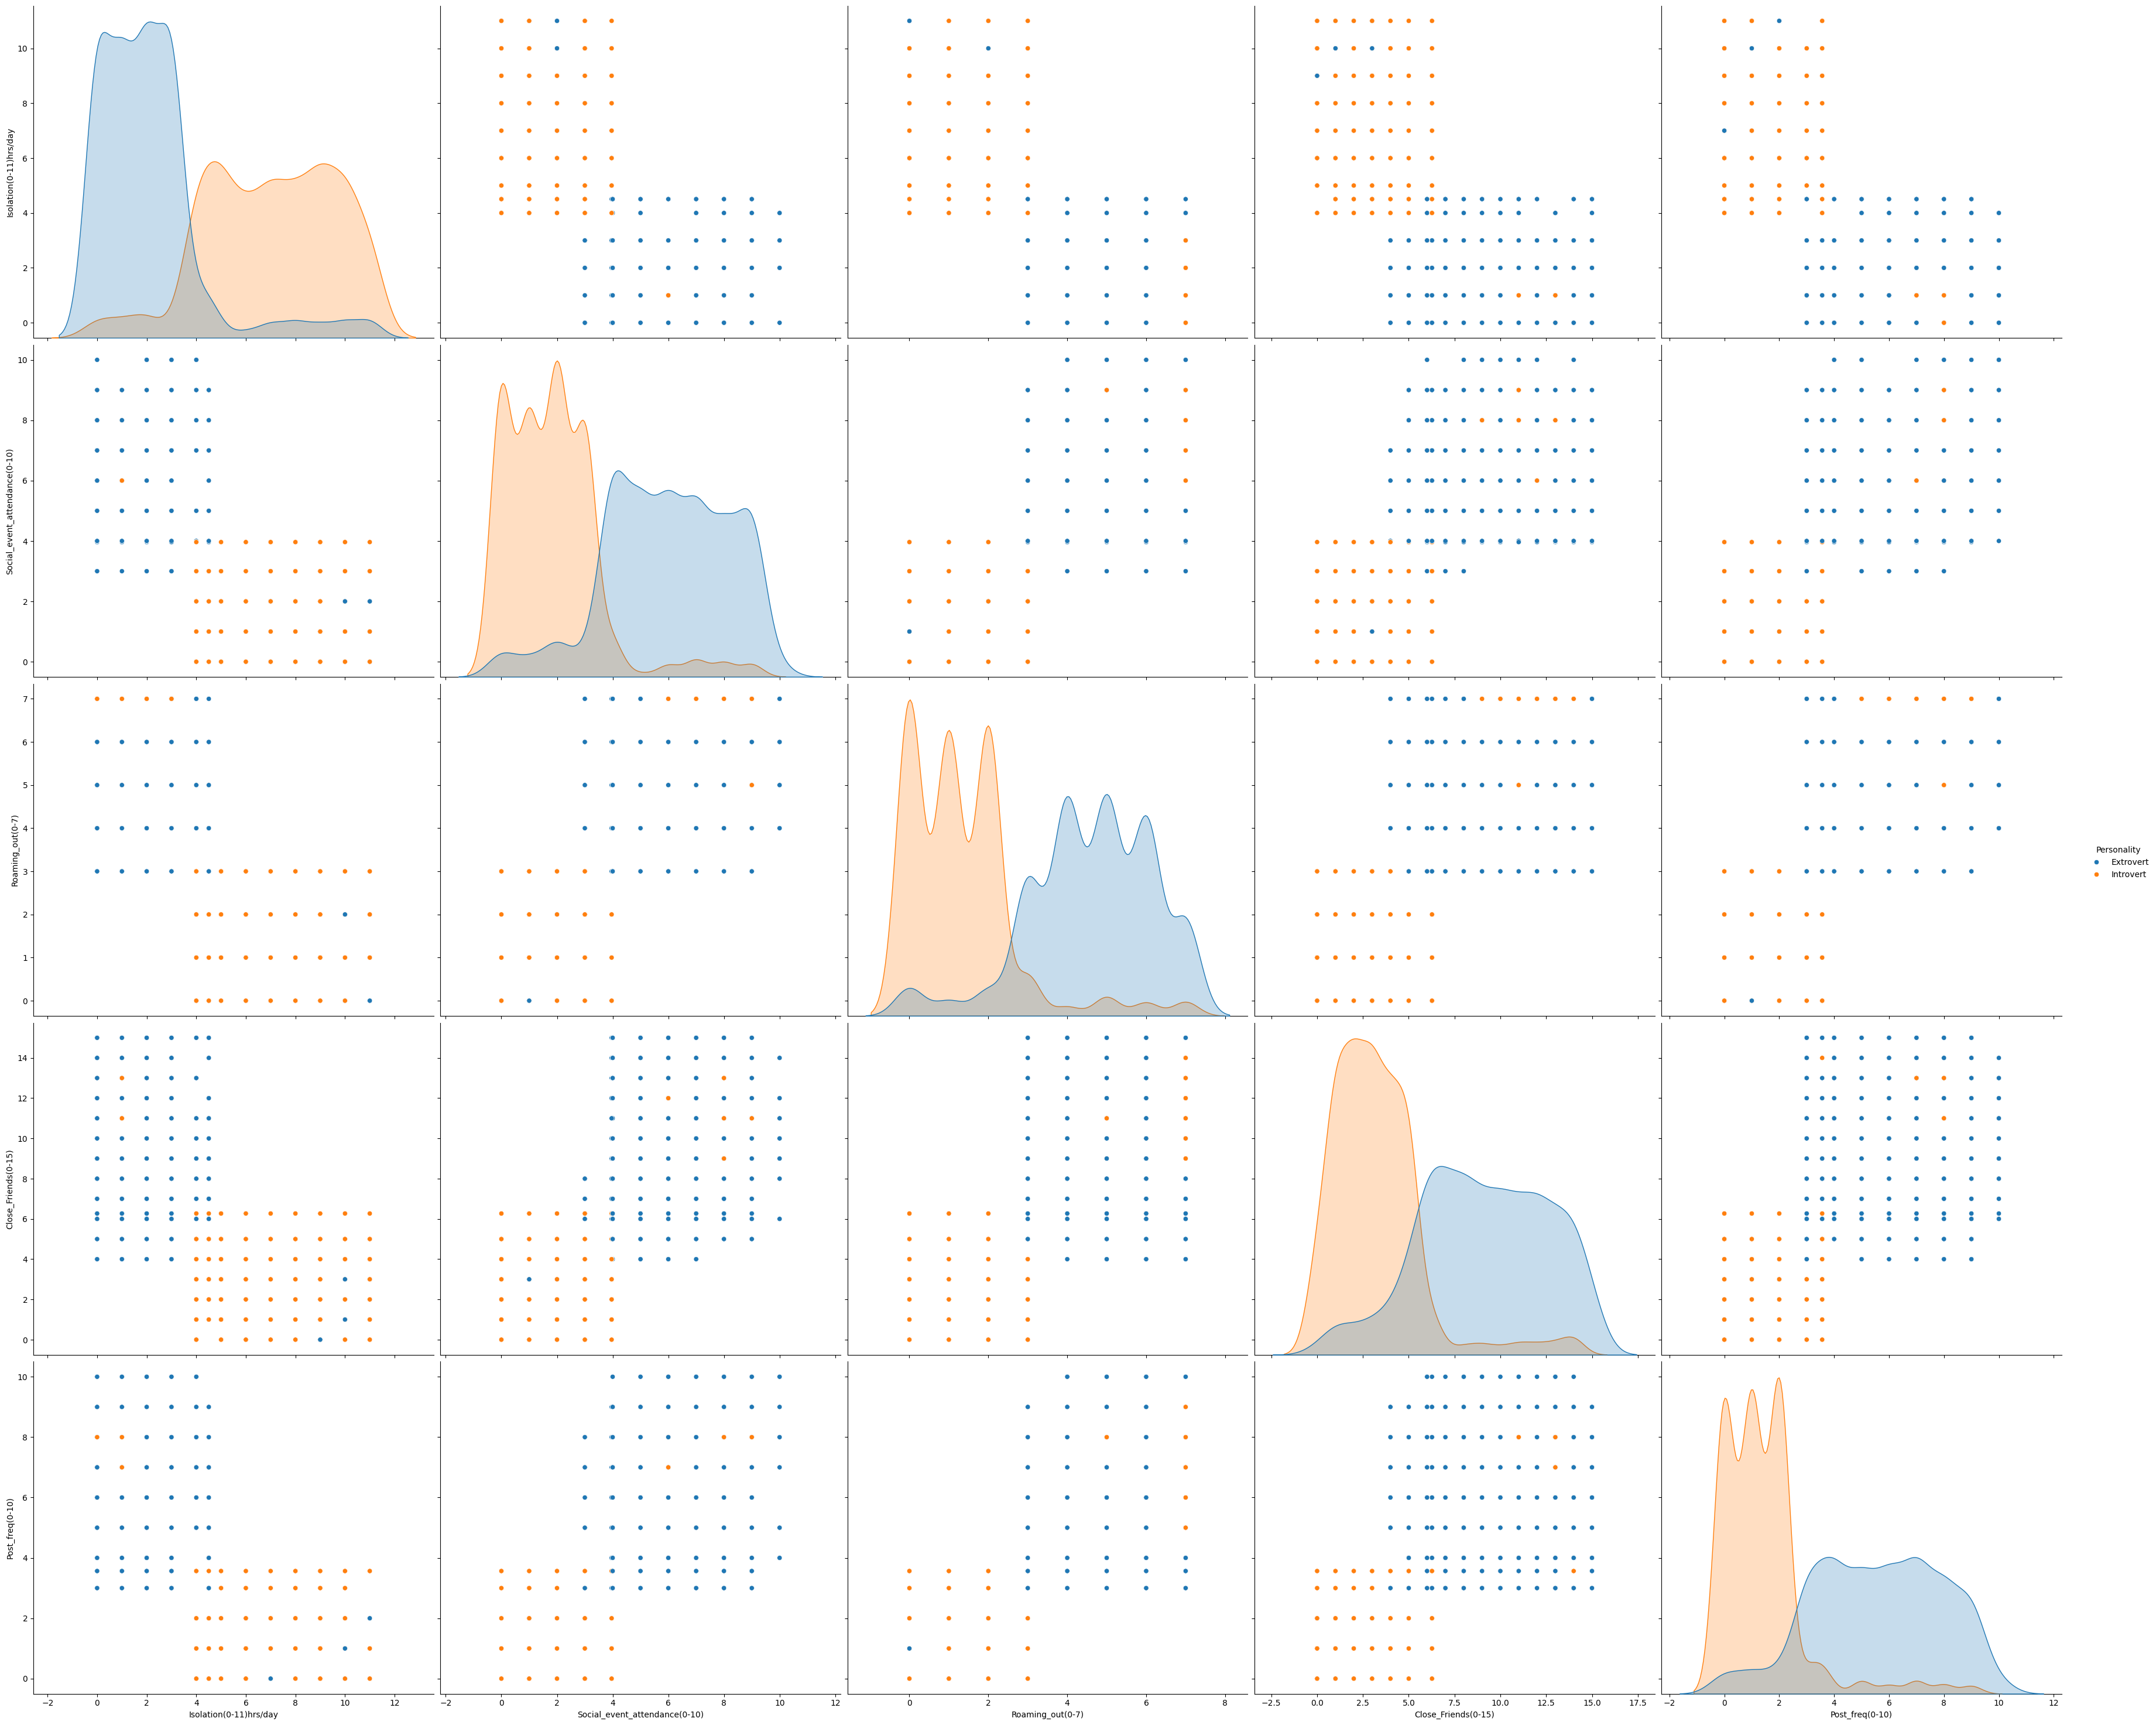

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Using pairplot to visualize relationships
#Pairplot uses various numerical features to plot pairwise relationships
sns.pairplot(data,hue='Personality',height=6, aspect=1.2)

In [7]:
#Encoding few categorical features for fitting a model
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Stage_fear'] = le.fit_transform(data['Stage_fear'])
data['Social_fatigue'] = le.fit_transform(data['Social_fatigue'])
data['Personality'] = le.fit_transform(data['Personality'])

In [8]:
#Before classifying, data needs to be splitted

from sklearn.model_selection import train_test_split
x = data.drop('Personality', axis=1)
y = data['Personality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#Split has been done successfully

(2030, 7) (870, 7) (2030,) (870,)


ACCURACY:  0.9103448275862069
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       463
           1       0.91      0.90      0.90       407

    accuracy                           0.91       870
   macro avg       0.91      0.91      0.91       870
weighted avg       0.91      0.91      0.91       870

CONFUSION MATRIX: 
 [[425  38]
 [ 40 367]]


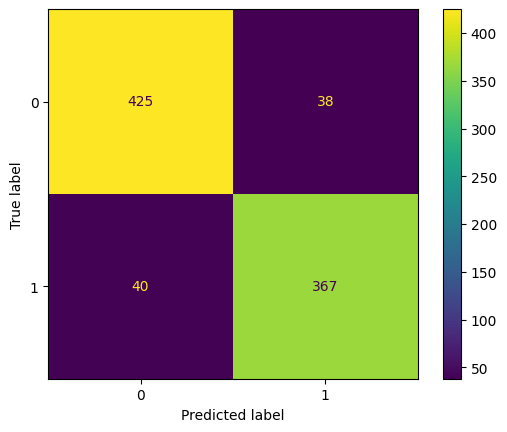

In [9]:
#Since dataset's target variable is categorical and
#almost all the features are effective in determining personality and
#we have both numerical and categorical features which are hard to
#encode using encoding techniques, we will use RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
accuracy = accuracy_score(y_test,y_pred)
print("ACCURACY: ",accuracy)        
print("CLASSIFICATION REPORT: \n",classification_report(y_test,y_pred))
print("CONFUSION MATRIX: \n",confusion_matrix(y_test,y_pred))
conf = confusion_matrix(y_test,y_pred)
matrix = ConfusionMatrixDisplay(conf,display_labels=model.classes_)
matrix.plot()

In [10]:
data.head(5)
data.dtypes

Isolation(0-11)hrs/day           float64
Stage_fear                         int64
Social_event_attendance(0-10)    float64
Roaming_out(0-7)                 float64
Social_fatigue                     int64
Close_Friends(0-15)              float64
Post_freq(0-10)                  float64
Personality                        int64
dtype: object

In [33]:
import pandas as pd

def prediction(inp) :
    prediction = model.predict([inp])
    pred_transformed = le.inverse_transform(prediction)
    if inp[1] == 1 :
        st_f =  'Yes' 
    else : 
        st_f = 'No'
    if inp[4] == 1 :
        sc_f =  'Yes' 
    else : 
        sc_f = 'No'
    print(f"Isolation(0-11)hrs/day : {inp[0]}\nStage_fear :{st_f}\nSocial_event_attendance(0-10) : {inp[2]}\nRoaming_out(0-7) : {inp[3]}\nSocial_fatigue : {sc_f}\nClose_Friends(0-15) : {inp[5]}\nPost_freq(0-10) : {inp[6]}\n\n\n...Personality : {pred_transformed[0]}\n")
    print("These predictions aren't meant to be taken personal...")
inp = []
inp.append(float(input("Enter time spent alone (0-11 hrs/day): ")))
stage_fear = str(input("Do you have stage fear? (YES/NO): "))
if stage_fear.lower() == 'yes':
    inp.append(1)
else:
    inp.append(0)
inp.append(float(input("How frequent do you attend events?(0-10) ")))
inp.append(float(input("How often you roam out?(days/week) : ")))
socialize_effect = str(input("Do you feel drained after socializing(YES/NO): "))
if socialize_effect.lower() == 'yes':
    inp.append(1)
else:
    inp.append(0)
inp.append(float(input("How many close friends do you have?(0-15) : :")))
inp.append(float(input("How frequently do you post on social media?(0-10) : ")))
prediction(inp)


Isolation(0-11)hrs/day : 4.0
Stage_fear :Yes
Social_event_attendance(0-10) : 4.0
Roaming_out(0-7) : 4.0
Social_fatigue : No
Close_Friends(0-15) : 5.0
Post_freq(0-10) : 3.0


...Personality : Extrovert

These predictions aren't meant to be taken personal...


c:\Users\omsai\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
